# Evaluation for minimal example *file*

In [1]:
# load data
import os
import numpy as np

best_sol_path = "experiments/3_qubit_Ent_ansatz"
compare_path = "experiments/3_qubit_U3_ansatz"
print(best_sol_path)

experiments/3_qubit_Ent_ansatz


## Data analysis for results

In [2]:
import json
res_path = os.path.join(best_sol_path,"results.json")
with open(res_path) as json_file:
    results = json.load(json_file)

import json
comp_res_path = os.path.join(compare_path,"results.json")
with open(comp_res_path) as json_file:
    comp_results = json.load(json_file)

In [3]:
from pprint import pprint
pprint(results)

{'accuse commission.': [0, 0.0],
 'accuse defendant.': [1, 0.994140625],
 'accuse demonstrator.': [1, 0.9912109375],
 'accuse fee.': [0, 0.0],
 'accuse interest.': [0, 0.0],
 'accuse offender.': [1, 0.99609375],
 'accuse person.': [1, 1.0],
 'accuse price.': [0, 0.0],
 'accuse rate.': [0, 0.0],
 'accuse rent.': [0, 0.0],
 'bill commission.': [1, 0.9970703125],
 'bill defendant.': [0, 0.0],
 'bill demonstrator.': [0, 0.0],
 'bill fee.': [1, 0.9951171875],
 'bill interest.': [1, 0.982421875],
 'bill offender.': [0, 0.0],
 'bill person.': [0, 0.0],
 'bill price.': [1, 0.9931640625],
 'bill rate.': [1, 0.998046875],
 'bill rent.': [1, 0.9912109375],
 'carry ball.': [1, 0.9912109375],
 'carry blood.': [0, 0.0],
 'carry melon.': [0, 0.0],
 'carry sphere.': [1, 0.990234375],
 'carry tea.': [0, 0.0],
 'carry wine.': [0, 0.0],
 'charge commission.': [1, 1.0000000000000002],
 'charge defendant.': [1, 0.9804687500000002],
 'charge demonstrator.': [1, 1.0175781250000002],
 'charge fee.': [1, 1.031

In [4]:
from scipy.stats import spearmanr
# convert to numpy array
results_np = np.array([results[r] for r in results])
spearmanr(results_np)

SpearmanrResult(correlation=0.8322623532071032, pvalue=3.8435096307651013e-28)

In [5]:
from scipy.stats import spearmanr
# convert to numpy array
comp_results_np = np.array([comp_results[r] for r in comp_results])
spearmanr(comp_results_np)

SpearmanrResult(correlation=0.8167279068830335, pvalue=2.4167936642987067e-26)

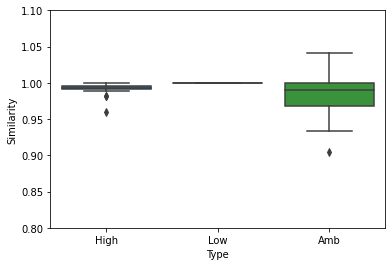

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from words import ambiguous_verbs

# create boxplots
results_high = [results[r][1] for r in results if results[r][0]==1]
highs = ["High" for i in range(len(results_high))]
results_low = [1-results[r][1] for r in results if results[r][0]==0]
lows = ["Low" for i in range(len(results_low))]
data = pd.DataFrame({"Similarity": results_high+results_low, "type": highs+lows})

# create boxplots
results_high = [results[r][1] for r in results if (results[r][0]==1 and r.split(" ")[0] not in ambiguous_verbs)]
highs = ["High" for i in range(len(results_high))]
results_low = [1-results[r][1] for r in results if results[r][0]==0 and r.split(" ")[0] not in ambiguous_verbs]
lows = ["Low" for i in range(len(results_low))]
results_amb = [results[r][1] for r in results if (r.split(" ")[0] in ambiguous_verbs)]
ambs = ["Amb" for i in range(len(results_amb))]
data = pd.DataFrame({"Similarity": results_high+results_low+results_amb, "Type": highs+lows+ambs})

dims = (10,7)
fig, ax = plt.subplots() #figsize=dims
#plt.rcParams["font.size"] = "12"
ax = sns.boxplot(ax=ax, x="Type", y="Similarity", data=data)
ax.set(ylim=(0.8, 1.1));

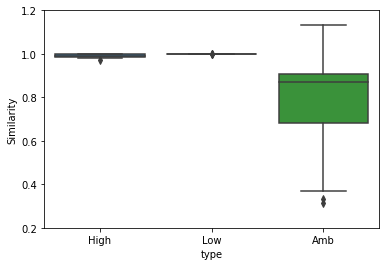

In [7]:
import seaborn as sns
import pandas as pd
from words import ambiguous_verbs

# create boxplots
results_high = [comp_results[r][1] for r in comp_results if (comp_results[r][0]==1 and r.split(" ")[0] not in ambiguous_verbs)]
highs = ["High" for i in range(len(results_high))]
results_low = [1-comp_results[r][1] for r in comp_results if comp_results[r][0]==0 and r.split(" ")[0] not in ambiguous_verbs]
lows = ["Low" for i in range(len(results_low))]
results_amb = [comp_results[r][1] for r in comp_results if (r.split(" ")[0] in ambiguous_verbs)]
ambs = ["Amb" for i in range(len(results_amb))]
data = pd.DataFrame({"Similarity": results_high+results_low+results_amb, "type": highs+lows+ambs})

dims = (10,7)
fig, ax = plt.subplots() #figsize=dims
#plt.rcParams["font.size"] = "16"
ax = sns.boxplot(ax=ax, x="type", y="Similarity", data=data)
ax.set(ylim=(0.2, 1.2));

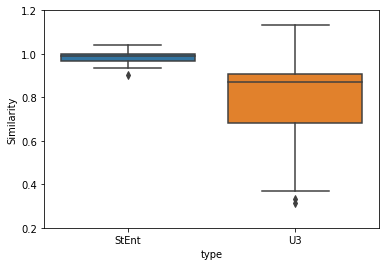

In [8]:
results_amb_StEnt = [results[r][1] for r in results if (r.split(" ")[0] in ambiguous_verbs)]
StEnt = ["StEnt" for i in range(len(results_amb))]
results_amb_U3 = [comp_results[r][1] for r in comp_results if (r.split(" ")[0] in ambiguous_verbs)]
U3 = ["U3" for i in range(len(results_amb))]

data = pd.DataFrame({"Similarity": results_amb_StEnt+results_amb_U3, "type": StEnt+U3})

dims = (10,7)
fig, ax = plt.subplots() #figsize=dims
#plt.rcParams["font.size"] = "16"
ax = sns.boxplot(ax=ax, x="type", y="Similarity", data=data)
ax.set(ylim=(0.2, 1.2));

In [9]:
print(data[data["type"]=="StEnt"].median())
print(data[data["type"]=="U3"].median())

Similarity    0.990234
dtype: float64
Similarity    0.871094
dtype: float64


## Visualize vector on Bloch Sphere

In [10]:
from discopy.quantum import Ket, H, Rx, Ry, Rz, CX, sqrt, X, Circuit, SWAP
from random import uniform
from math import pi


# Ansätze for 3-qubit states
n_amb_params = 9
def amb_verb_ansatz(p):
    return Ket(0,0,0) >> \
        Rx(p[0]) @ Rx(p[1]) @ Rx(p[2]) >> \
        Ry(p[3]) @ Ry(p[4]) @ Ry(p[5]) >> \
        Rz(p[6]) @ Rz(p[7]) @ Rz(p[8]) >> \
        CX  @ Circuit.id(1) >> \
        Circuit.id(1) @ CX >> \
        Circuit.id(1) @ SWAP >> \
        SWAP @ Circuit.id(1) >> \
        CX @ Circuit.id(1) >> \
        SWAP @ Circuit.id(1) >> \
        Circuit.id(1) @ SWAP @ sqrt(2)
        
        
        # Rz(p[0]) @ Rx(p[1]) @ Circuit.id(1) >> \
        # Rx(p[2]) @ Rz(p[3]) @ Circuit.id(1) >> \
        # CX @ Circuit.id(1) >> \
        # Rx(p[4]) @ Rz(p[5]) @ Rx(p[6]) >> \
        # Rz(p[7]) @ Rx(p[8]) @ Rz(p[9]) >> \
        # Circuit.id(1) @ CX >> \
        # Circuit.id(1) @ Rx(p[10]) @ Rz(p[11]) >> \
        # Circuit.id(1) @ Rz(p[12]) @ Rx(p[13]) >> \
        # Circuit.id(1) @ Circuit.id(1) @ Circuit.id(1) @ sqrt(2)

n_unamb_ansatz = 3
def unamb_verb_ansatz(p):
    return Ket(p[0],p[1],p[2])

n_noun_params = 3
def noun_ansatz(p):
    return Ket(0,0,0) >> \
    Ry(p[0]) @ Ry(p[1]) @ Ry(p[2])


In [11]:
params_path = os.path.join(best_sol_path,"params.json")
with open(params_path) as json_file:
    params = json.load(json_file)
pprint(params)


{'account': {'learn': False,
             'p': [0.5310260239125788, 0.4971367854279607, 0.0251158206802255]},
 'accuse': {'learn': False, 'p': [1, 0, 0]},
 'application': {'learn': False,
                 'p': [0.5243847334750618,
                       0.5198900368336674,
                       0.005863708239716066]},
 'ball': {'learn': False,
          'p': [4.7416472910613144e-08,
                0.9988048084153139,
                0.5321478616672558]},
 'bill': {'learn': False, 'p': [1, 1, 1]},
 'blood': {'learn': False,
           'p': [0.9874679352174055,
                 0.47395772704552275,
                 0.011067987960558466]},
 'carry': {'learn': False, 'p': [0, 0, 1]},
 'charge': {'learn': True,
            'p': [0.25181250681702294,
                  0.49933232823344986,
                  0.5009094641871016,
                  0.7420782916163317,
                  0.003214365625619375,
                  0.4984754044982887,
                  0.5921127331288812,
            

In [12]:
from pytket.extensions.qiskit import AerBackend, tk_to_qiskit
from qiskit import Aer, execute

backend = Aer.get_backend('statevector_simulator')
verb = tk_to_qiskit(amb_verb_ansatz(params["charge"]["p"]).to_tk())
job = execute(verb, backend=backend, shots=1, memory=True)
job_result = job.result()
print(np.round(np.abs(job_result.get_statevector(verb))**2,3))

[0.  0.5 0.  0.  0.  0.  0.  0.5]


In [13]:
(amb_verb_ansatz(params["charge"]["p"]).eval().array.flatten()/np.sqrt(2)).round(2)

array([ 0.  +0.01j,  0.  +0.j  ,  0.  -0.j  , -0.01+0.j  , -0.15+0.69j,
        0.  +0.j  , -0.  +0.j  ,  0.66-0.26j])

In [14]:
pprint(params["knock"]["p"])
pprint(params["carry"]["p"])
pprint(params["drip"]["p"])
pprint(params["smooth"]["p"])
pprint(params["accuse"]["p"])
pprint(params["intercept"]["p"])
pprint(params["register"]["p"])
pprint(params["bill"]["p"])

[0, 0, 0]
[0, 0, 1]
[0, 1, 0]
[0, 1, 1]
[1, 0, 0]
[1, 0, 1]
[1, 1, 0]
[1, 1, 1]


## Plot graphs

In [15]:
evo_nouns_path = os.path.join(best_sol_path,"evo_nouns.json")
with open(evo_nouns_path) as json_file:
    evo_nouns = json.load(json_file)

Text(0.5, 1.0, 'SPSA optimization 3-qubit model - Nouns')

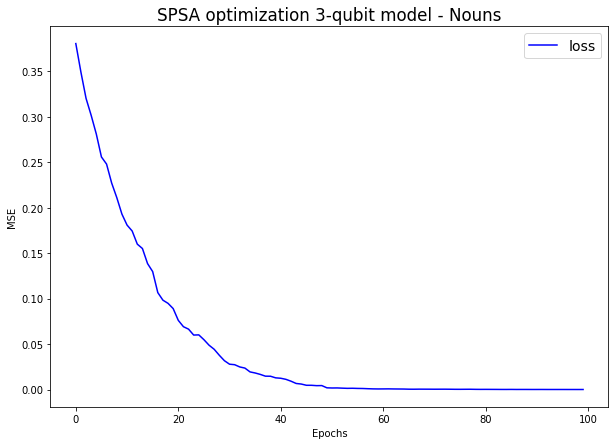

In [16]:
import matplotlib.pyplot as plt


dims = (10,7)
fig, ax = plt.subplots(figsize=dims)
plt.rcParams["font.size"] = "14"
plt.plot(range(len(evo_nouns)), evo_nouns, '-b', label='loss')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend(loc='upper right')
plt.title("SPSA optimization 3-qubit model - Nouns")

Text(0.5, 1.0, 'SPSA optimization 3-qubit model - Amb. verbs')

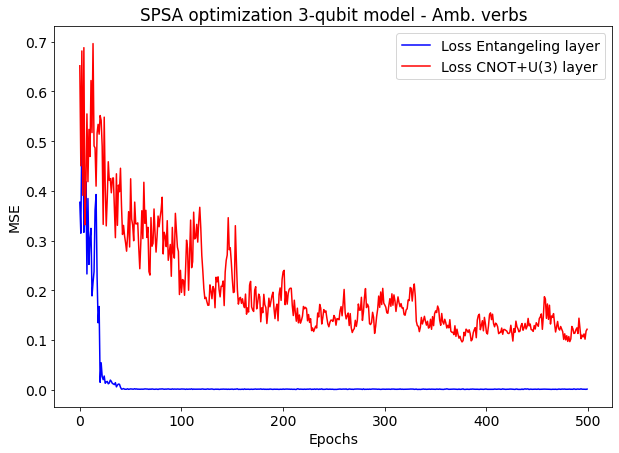

In [17]:
evo_verbs_path = os.path.join(best_sol_path,"evo_verbs.json")
with open(evo_verbs_path) as json_file:
    evo_verbs = json.load(json_file)

evo_verbs_compare_path = os.path.join(compare_path,"evo_verbs.json")
with open(evo_verbs_compare_path) as json_file:
    evo_verbs_compare = json.load(json_file)


dims = (10,7)
fig, ax = plt.subplots(figsize=dims)
plt.rcParams["font.size"] = "14"
plt.plot(range(len(evo_verbs)), evo_verbs, '-b', label='Loss Entangeling layer')
plt.plot(range(len(evo_verbs_compare)), evo_verbs_compare, '-r', label='Loss CNOT+U(3) layer')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend(loc='upper right')
plt.title("SPSA optimization 3-qubit model - Amb. verbs")